# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

# <a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: Q1. What are the frequent routes of user.
            Q2. Avalibiliy of bikes round the clock

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data collection

In [2]:
df_nyc = pd.read_csv('./data/NYC-CitiBike-2016.csv')
df_chicago = pd.read_csv('./data/Chicago-Divvy-2016.csv')
df_washington = pd.read_csv('./data/Washington-CapitalBikeshare-2016.csv')

In [3]:
df_nyc.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,839,1/1/2016 00:09:55,1/1/2016 00:23:54,532,S 5 Pl & S 4 St,40.710451,-73.960876,401,Allen St & Rivington St,40.720196,-73.989978,17109,Customer,NaN,0


In [4]:
df_chicago.head(1)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0


In [5]:
df_washington.head(1)

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,427387,3/31/2016 22:57,3/31/2016 23:04,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Registered


If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: **trip duration, starting month, starting hour, day of the week, and user type**. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

## Data Wrangling for NYC dataframe

In [6]:
df_nyc.tripduration/= 60 # Converts the NYC dataframe 'tripduration' column into minutes from seconds

In [7]:
df_nyc['starttime'] = pd.to_datetime(df_nyc['starttime'], format='%m/%d/%Y %H:%M:%S',)

In [8]:
df_nyc['starting_month'] = pd.DatetimeIndex(df_nyc['starttime']).month

In [9]:
df_nyc['starting_hour'] = pd.DatetimeIndex(df_nyc['starttime']).hour

In [10]:
df_nyc['day_of_the_week'] = pd.DatetimeIndex(df_nyc['starttime']).strftime("%A")

 ##  Data Wrangling for Chicago dataframe

In [11]:
df_chicago.tripduration/=60 # Converts the Chicago dataframe 'tripduration' column into minutes from seconds

In [12]:
df_chicago['starttime'] = pd.to_datetime(df_chicago['starttime'], format='%m/%d/%Y %H:%M')

In [13]:
df_chicago['starting_month'] = pd.DatetimeIndex(df_chicago['starttime']).month

In [14]:
df_chicago['starting_hour'] = pd.DatetimeIndex(df_chicago['starttime']).hour

In [15]:
df_chicago['day_of_the_week'] = pd.DatetimeIndex(df_chicago['starttime']).strftime("%A")

## Data Wrangling for Washington dataframe

In [16]:
df_washington['Duration (ms)']/=60000 # Converts the Washington dataframe 'Duration (ms)' column into minutes from miliseconds

In [17]:
df_washington.rename(index=str, columns={"Duration (ms)": "tripduration"},inplace=True) # Renames the 'Duration (ms)' column
                                                                                        # to 'tripduration'

In [18]:
df_washington['Start date'] = pd.to_datetime(df_washington['Start date'], format='%m/%d/%Y %H:%M')

In [19]:
df_washington['starting_month'] = pd.DatetimeIndex(df_washington['Start date']).month

In [20]:
df_washington['starting_hour'] = pd.DatetimeIndex(df_washington['Start date']).hour

In [21]:
df_washington['day_of_the_week'] = pd.DatetimeIndex(df_washington['Start date']).strftime("%A")

In [22]:
# Converts the Registered customers in Washington dataframe to Subscriber under 'Member Type' column
df_washington['Member Type'] = df_washington['Member Type'].str.replace("Registered","Subscriber")

In [23]:
# Converts the Casual customers in Washington dataframe to Customer under 'Member Type' column
df_washington['Member Type'] = df_washington['Member Type'].str.replace("Casual","Customer")

In [24]:
# Renames the 'Member Type' column of Washington dataframe to 'usertype'
df_washington.rename(index=str, columns={"Member Type": "usertype"},inplace=True)

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

## Writing the cleaned columns to new csv files

In [25]:
header = ['tripduration','starting_month','starting_hour','day_of_the_week','usertype']

In [26]:
df_nyc.to_csv('./data/NYC-2016-Summary.csv', columns = header, index=False)

In [27]:
df_chicago.to_csv('./data/Chicago-2016-Summary.csv', columns = header, index=False)

In [28]:
df_washington.to_csv('./data/Washington-2016-Summary.csv', columns = header, index=False)

## Reading the cleaned csv files and checking for further analysis

In [29]:
df_nyc_clean = pd.read_csv('./data/NYC-2016-Summary.csv')
df_chicago_clean = pd.read_csv('./data/Chicago-2016-Summary.csv')
df_washington_clean = pd.read_csv('./data/Washington-2016-Summary.csv')

In [30]:
df_nyc_clean.head(1)

,tripduration,starting_month,starting_hour,day_of_the_week,usertype
0,13.983333,1,0,Friday,Customer


In [31]:
df_chicago_clean.head(1)

,tripduration,starting_month,starting_hour,day_of_the_week,usertype
0,15.433333,3,23,Thursday,Subscriber


In [32]:
df_washington_clean.head(1)

,tripduration,starting_month,starting_hour,day_of_the_week,usertype
0,7.123117,3,22,Thursday,Subscriber


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
 1. City with highest number of trips is **NYC**.
 2. City with highest proportion of trips made by subscribers is **NYC**.
 3. City with highest proportion of trips made by short-term customers is **Chicago**.

### Calculation for Answer 1

In [33]:
total_trip_nyc = df_nyc_clean['usertype'].value_counts().sum() # Calculating the total number of trips for NYC
print("Total number of trips in NYC is ", total_trip_nyc)

Total number of trips in NYC is  276081


In [34]:
total_trip_chicago = df_chicago_clean['usertype'].value_counts().sum() # Calculating the total number of trips for Chicago
print("Total number of trips in Chicago is ", total_trip_chicago)

Total number of trips in Chicago is  72131


In [35]:
# Calculating the total number of trips for Washington
total_trip_washington = df_washington_clean['usertype'].value_counts().sum()
print("Total number of trips in Washington is ", total_trip_washington)

Total number of trips in Washington is  66326


### Calculation for Answer 2 and 3

In [36]:
subs_nyc, cust_nyc = df_nyc_clean['usertype'].value_counts()
prop_subs_nyc = subs_nyc/total_trip_nyc
prop_cust_nyc = cust_nyc/total_trip_nyc
print("Proportion of trip made by Subscribers in NYC is ", prop_subs_nyc)
print("Proportion of trip made by Customers in NYC is ", prop_cust_nyc)

Proportion of trip made by Subscribers in NYC is  0.890666145081
Proportion of trip made by Customers in NYC is  0.109333854919


In [37]:
subs_chic, cust_chic = df_chicago_clean['usertype'].value_counts()
prop_subs_chic = subs_chic/total_trip_chicago
prop_cust_chic = cust_chic/total_trip_chicago
print("Proportion of trip made by Subscribers in Chicago is ", prop_subs_chic)
print("Proportion of trip made by Customers in Chicago is ", prop_cust_chic)

Proportion of trip made by Subscribers in Chicago is  0.762252013697
Proportion of trip made by Customers in Chicago is  0.237747986303


In [38]:
subs_wash, cust_wash = df_washington_clean['usertype'].value_counts()
prop_subs_wash = subs_wash/total_trip_washington
prop_cust_wash = cust_wash/total_trip_washington
print("Proportion of trip made by Subscribers in Washington is ", prop_subs_wash)
print("Proportion of trip made by Customers in Washington is ", prop_cust_wash)

Proportion of trip made by Subscribers in Washington is  0.780282242258
Proportion of trip made by Customers in Washington is  0.219717757742


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 

Average trip length for each city:
1. **Washington** - 18.932874 minutes (approx 18.93 minutes)
2. **NYC** - 15.812593 minutes (approx 15.81 minutes)
3. **Chicago** - 16.563629 minutes (approx 16.56 minutes)

Proportion of rides longer than 30 minutes, for each city is mentioned below:
1. **Washington** - 10.83 %
2. **NYC** - 7.30 %
3. **Chicago** -  8.33 %

### Calculations of Average trip length for NYC, Chicago and Washington

In [39]:
df_nyc_clean['tripduration'].describe()

count    276798.000000
mean         15.812593
std         103.860877
min           1.016667
25%           6.366667
50%          10.516667
75%          17.833333
max       39395.966667
Name: tripduration, dtype: float64

In [40]:
df_chicago_clean['tripduration'].describe()

count    72131.000000
mean        16.563629
std         32.848301
min          1.000000
25%          6.800000
50%         11.683333
75%         19.566667
max       1439.416667
Name: tripduration, dtype: float64

In [41]:
df_washington_clean['tripduration'].describe()

count    66326.000000
mean        18.932874
std         39.661080
min          1.010550
25%          6.766708
50%         11.517492
75%         19.543046
max       1422.516367
Name: tripduration, dtype: float64

### Calculations of proportion of rides longer than 30 mins:-
**For New York City**

In [42]:
tripduration_grt30_nyc = df_nyc_clean.query('tripduration > 30.000000') # Filtering out data more than 30 min

In [43]:
tripduration_grt30_nyc['tripduration'].describe()

count    20213.000000
mean        70.706669
std        379.316724
min         30.016667
25%         32.800000
50%         36.850000
75%         45.000000
max      39395.966667
Name: tripduration, dtype: float64

In [44]:
prop_tripduration_grt30_nyc = (tripduration_grt30_nyc['tripduration'].count()/df_nyc_clean['tripduration'].count())*100

print("Proportion of ride greater than 30 min for NYC is", prop_tripduration_grt30_nyc, "%")

Proportion of ride greater than 30 min for NYC is 7.30243715634 %


**For Chicago city**

In [45]:
tripduration_grt30_chic = df_chicago_clean.query('tripduration > 30.000000') # Filtering out data more than 30 min

In [46]:
tripduration_grt30_chic['tripduration'].describe()

count    6010.000000
mean       64.142099
std        99.679743
min        30.016667
25%        33.804167
50%        41.808333
75%        60.191667
max      1439.416667
Name: tripduration, dtype: float64

In [47]:
prop_tripduration_grt30_chic = (tripduration_grt30_chic['tripduration'].count()/df_chicago_clean['tripduration'].count())*100

print("Proportion of ride greater than 30 min for Chicago city is ", prop_tripduration_grt30_chic,"%")

Proportion of ride greater than 30 min for Chicago city is  8.3320624974 %


** For Washington city**

In [48]:
tripduration_grt30_wash = df_washington_clean.query('tripduration > 30.000000') # Filtering out data more than 30 min

In [49]:
tripduration_grt30_wash['tripduration'].describe()

count    7189.000000
mean       77.345064
std       101.510227
min        30.001933
25%        36.457917
50%        51.005183
75%        83.083967
max      1422.516367
Name: tripduration, dtype: float64

In [50]:
prop_tripduration_grt30_wash = (tripduration_grt30_wash['tripduration'].count()/df_washington_clean['tripduration'].count())*100

print("Proportion of ride greater than 30 min for Washington city is ", prop_tripduration_grt30_wash,"%")

Proportion of ride greater than 30 min for Washington city is  10.8388867111 %


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: For NYC, on an average Customers takes longer rides

In [51]:
df_nyc_clean.groupby('usertype', as_index=False)['tripduration'].mean()

,usertype,tripduration
0,Customer,32.982004
1,Subscriber,13.680791


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

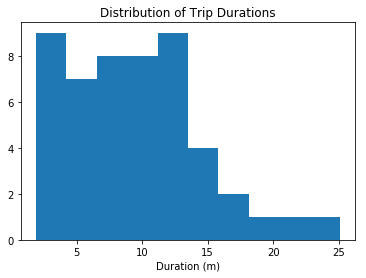

In [52]:
# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

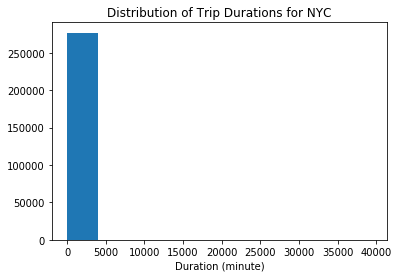

In [53]:
trip_data_list = df_nyc_clean['tripduration']

plt.hist(trip_data_list)
plt.title('Distribution of Trip Durations for NYC')
plt.xlabel('Duration (minute)')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: In NYC data, for Subscribers the peak is around 8 mins and for Customers it is around 22 mins. Both the distribution of subscriber and customer data are positively skewed.

In [54]:
nyc_subs_trip_less75 = df_nyc_clean.query('usertype == "Subscriber" and tripduration < 75.000000')

In [55]:
nyc_cust_trip_less75 = df_nyc_clean.query('usertype == "Customer" and tripduration < 75.000000')

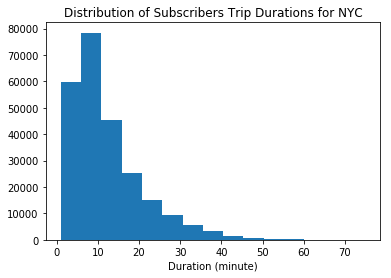

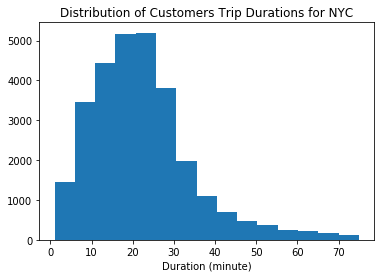

In [56]:
subscriber_data = nyc_subs_trip_less75['tripduration']
customers_data = nyc_cust_trip_less75['tripduration']

plt.hist(subscriber_data, bins=15)
plt.title('Distribution of Subscribers Trip Durations for NYC')
plt.xlabel('Duration (minute)')
plt.show()

plt.hist(customers_data, bins=15)
plt.title('Distribution of Customers Trip Durations for NYC')
plt.xlabel('Duration (minute)')
plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Question to explore for NYC data**: How does ridership differ by month? Which month has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month?

**Answer**
1. Ridership has an increasing trend from January to September, with a dip observed in July.
2. The month of September has the highest ridership.
3. Yes, the ratio of Subscriber trips to Customer trips change depending on the month. The highest is in December and lowest is in July

In [57]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##

def ridership_analysis(filename):
    
    data_dict={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]}
      
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        for row in reader:
            i = int(row['starting_month'])
            data_dict[i].append(row['usertype'])
    return data_dict

In [58]:
nyc_file = './data/NYC-2016-Summary.csv'
dataa_dict = ridership_analysis(nyc_file)

subscriber_list=[]
customer_list=[]
subs_to_cust_ride_ratio=[]

for i in range(1,13,1):
    subscriber_list.append(dataa_dict[i].count('Subscriber'))
    customer_list.append(dataa_dict[i].count('Customer'))
    subs_to_cust_ride_ratio.append(subscriber_list[i-1]/customer_list[i-1])

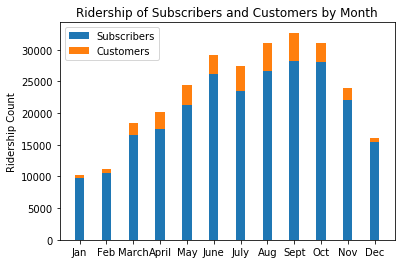

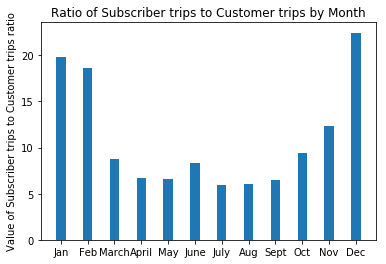

In [59]:
ind = range(0,12,1)

subs_plot = plt.bar(ind,subscriber_list,0.35)
cust_plot = plt.bar(ind,customer_list,0.35, bottom = subscriber_list)

plt.ylabel('Ridership Count')
plt.title('Ridership of Subscribers and Customers by Month')
plt.xticks(ind, ('Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'))

plt.legend((subs_plot[0],cust_plot[0]), ('Subscribers', 'Customers'))

plt.show()

subs_to_cust_ratio_plot = plt.bar(ind,subs_to_cust_ride_ratio,0.35)

plt.ylabel('Value of Subscriber trips to Customer trips ratio')
plt.title('Ratio of Subscriber trips to Customer trips by Month')
plt.xticks(ind, ('Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'))

plt.show()

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I would like to be able to apply the techniques of data science on analysing the performance indicators of Thermal Power Plant process and woud like to learn how each key metrics are affecting the performance and to what extent.  

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0